In [4]:
#!pip install mlxtend
#%matplotlib notebook

## Import all the relevant libraries

In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from scipy.signal import argrelextrema


In [6]:
from lib.normalize import acc_scalar2, frequency, magnitude
from lib.plot import plot_activity
from lib.transform import transform


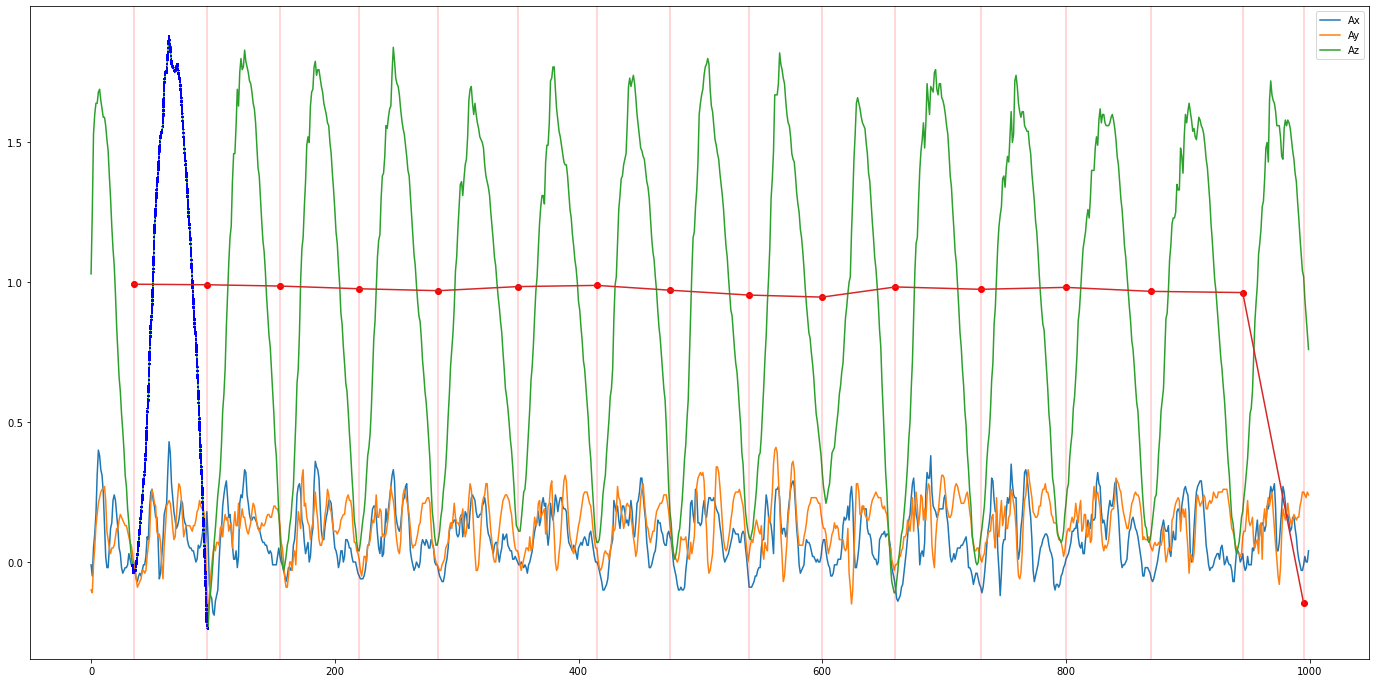

max    16
lag    16
cor    16
dtype: int64

In [7]:
COLUMN = "Az"
df = transform()[[COLUMN]]
transform()[['Ax','Ay','Az']].iloc[0:1000].plot(figsize=(24, 12))
# df.Time = df.Time.dt.float

hz = 100
min = int(0.5*hz)
max = 5*hz
increment = 100


def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag), method="pearson")

max = 1000
rs =pd.DataFrame(columns=['cor','lag'])

for x in range(0,int(max),5):
  offset= x
  pa = df.iloc[34:97]
  x = pa.reset_index()[COLUMN]
  y = df.iloc[offset:97-34 +offset].reset_index()[COLUMN]
  pa[COLUMN].plot(c='b',style='-.')
  c = crosscorr(x,y)
  rs= rs.append({'cor':c,'lag':offset},ignore_index=True)
n = 2
rs['max'] = rs.iloc[argrelextrema(rs['cor'].values, np.greater_equal, order=n)[0]]['cor']

rs =rs[['max','lag','cor']].dropna()
rs=rs.set_index(rs['lag'])
plt.scatter(rs.index, rs['max'], c='r')
[plt.axvline(m, c='r', linewidth=0.3) for m in rs['lag'].to_list()]
plt.plot(rs.index, rs['cor'])
plt.show()
rs.count()
